In [1]:
#INTEGRANTES DEL EQUIPO
# BRYAN CALDERON
# DAN MUÑIZ

import numpy as np
import matplotlib.pyplot as plt
import time

###funcion para plotear####
def Plotear(coord):
    xs = [i[0] for i in coord]
    ys = [i[1] for i in coord]
    plt.plot(xs,ys)
    plt.show()

In [2]:
def hess_Rosembrock(x):#LA MATRIZ HESSIANA DE LA FUNCION ROSEMBROCK SIGUE LA MISMA CONSTRUCCION
    n= x.size          #YA CALCULADA EN LA TAREA 2 DEL CURSO DE OPTIMIZACION 
    size=(n,n)
    H = np.zeros(size)
    H[0][0]=(1200*(x[0])**2)-400*x[1]+2
    H[n-1][n-1]=200
    for i in range(1,n-1):
        H[i,i]=1200*x[i]**2-400*x[i+1]+202
    for i in range(0,n-1):
        H[i,i+1]=-400*x[i]
    for i in range(1,n):
        H[i,i-1]=-400*x[i-1]
    return H

def hess_wood(x):
    n=x.size
    tam=(n,n)
    H=np.zeros(tam)
    x1=x[0]
    x2=x[1]
    x3=x[2]
    x4=x[3]
    n=x.size
    
    H[0,0]=1200*x1**2 - 400*x2 + 2
    H[0,1]=-400*x1
    H[1,0]=-400*x1
    H[1,1]=  220.2
    H[1,3]= 19.8
    H[2,2]= 1080*x3**2 - 360*x4 + 2
    H[2,3]= -360*x3
    H[3,1]= 19.8
    H[3,2]=-360*x3
    H[3,3]=200.2

    return H

In [3]:
def grad_Rosembrock(x):
    n= x.size
    G=np.zeros(n)
    G[0] = 400*x[0]**3-400*x[0]*x[1]+2*x[0]-2
    for i in range(1,n-1):
        G[i]= 200*(x[i]-(x[i-1])**2)-400*(x[i+1]-(x[i])**2)*x[i]-2*(1-x[i]) 
    G[n-1] = 200*(x[n-1]-x[n-2]**2)
    return G

def Rosembrock(x):
    n= x.size
    sum = 0
    for i in range(n-1):
        sum += 100*(x[i+1]-x[i]**2)**2+(x[i]-1)**2
    return sum

### CLS METHOD

In [4]:
def CLS(x, f, p, f0, v, a_Init, a_Max, B = 0.02, Q = 25):
  #Inicializamos
  first, alphaMin, alphaMax, alpha = 1, 0, 10, a_Init
  while(1):
    muAlpha = (f0 - f(x + alpha*p))/(alpha*v)
    #print("alpha = ", alpha, "alphaMin = ", alphaMin, "alphaMax = ", alphaMax, "muAlpha = ", muAlpha)
    if(muAlpha*abs(muAlpha - 1) >= B ): break #condicion de descenso suficiente fue satisfecha
    if(muAlpha > 1/2): alphaMin = alpha
    elif( alpha == a_Max ): break
    else: alphaMax = alpha

    if( first ): #Aseguramos que el caso cuadratico sea manejado optimamente
      first = 0
      if( muAlpha < 1): alpha = alpha/(2*(1 - muAlpha))
      else: alpha = alpha*Q
    else:
      if(alphaMax == 10): alpha = alpha*Q
      elif(alphaMin == 0): alpha = alpha/(2*(1 - muAlpha))
      else: alpha = np.sqrt(alphaMin*alphaMax)

    alpha = min(alpha, a_Max)

  return alpha


def find_minimal(x, f, g, k, lam, eps = 1e-4):
  fx, gx, it = f(x), g(x), 0
  normG = np.linalg.norm(gx)

  graf1=[]
  graf2=[]
  graf1.append((it,np.linalg.norm(g(x))))
  graf2.append((it,f(x)))

  while(normG > eps and it < 100000):
     #print("Gradiente = ", normG)
     v = np.dot(gx.T, gx)
     alpha = CLS(x, f, -gx, fx, v, k*v/(normG**2), lam*v/(normG**2))
     x = x - alpha*gx
     it += 1
     fx, gx = f(x), g(x)
     normG = np.linalg.norm(gx)

     graf1.append((it,np.linalg.norm(g(x))))
     graf2.append((it,f(x)))

  return x, it, graf1, graf2

CLS
x* =  [0.99995858 0.99991698 1.00004143 1.00008301]
Valor de la norma del gradiente al evaluar en x*:  9.673051423439987e-05
Numero de iteraciones realizadas:  2481
Tiempo:  0.24755072593688965


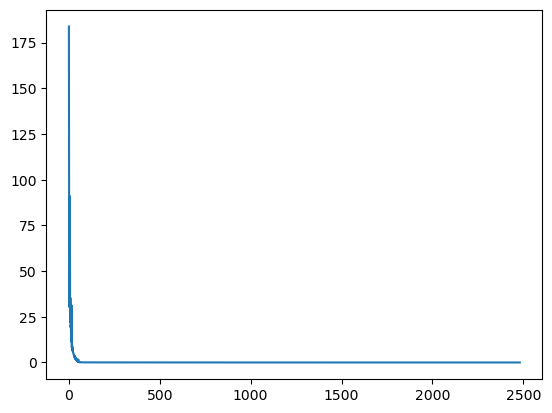

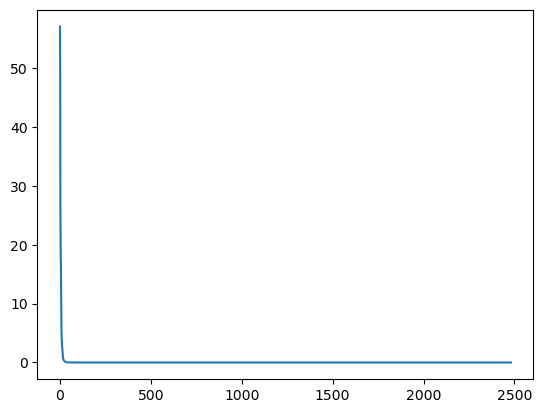

In [9]:
#Wood function
def wood(x):
  sum = 100*(x[0]**2 - x[1])**2 + (x[0] - 1)**2 + (x[2] - 1)**2
  sum += 90*(x[2]**2 - x[3])**2 + 10.1*((x[1] - 1)**2 + (x[3] - 1)**2) 
  sum += 19.8*(x[1] - 1)*(x[3] - 1)
  return sum
#funcion que te calcula el gradiente
def grad_wood(x):
  g = np.zeros(4)
  g[0] = 400*x[0]*(x[0]**2 - x[1]) + 2*(x[0] - 1)
  g[1] = -200*(x[0]**2 - x[1]) + 20.2*(x[1] - 1) + 19.8*(x[3] - 1)
  g[2] = 2*(x[2] - 1) + 360*x[2]*(x[2]**2 - x[3])
  g[3] = -180*(x[2]**2 - x[3]) + 20.2*(x[3] - 1) + 19.8*(x[1] - 1)
  return g

x = np.random.rand(4)
start = time.time()
x, it, CLS_graf_grad, CLS_graf_function = find_minimal(x, wood, grad_wood, 0.01, 1)
stop = time.time()

print("CLS")
print("x* = ", x)
print("Valor de la norma del gradiente al evaluar en x*: ", np.linalg.norm(grad_wood(x)))
print("Numero de iteraciones realizadas: ", it)
print("Tiempo: ", stop-start)
Plotear(CLS_graf_grad)
Plotear(CLS_graf_function)

#start = time.time()
#stop = time.time()  
#print("Tiempo: ", stop-start) 

# DESENSO DEL GRADIENTE CLASICO

Solucion es : [0.99995611 0.99991208 1.00004388 1.00008792] El numero de itearciones es:  158746
Tiempo:  4.3024632930755615


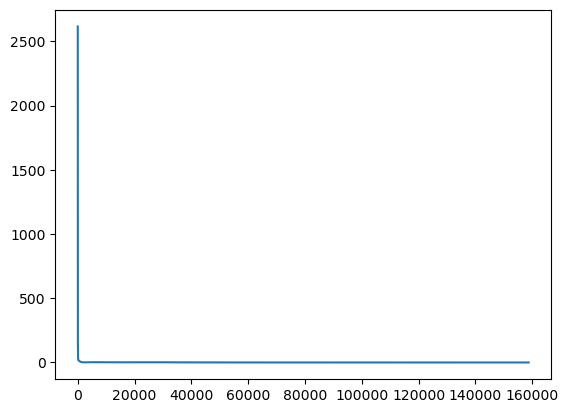

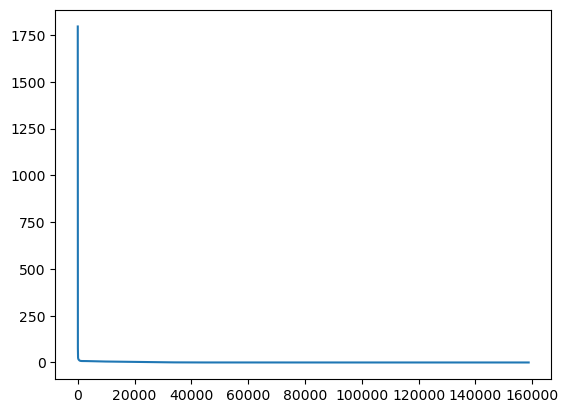

In [12]:
def Steepest_decent(x0,f,g,tol):
    k=0
    G = g(x0)
    x=x0
    alpha = 0.0001
    graf1=[]
    graf2=[]
    graf1.append((k,np.linalg.norm(G)))
    graf2.append((k,f(x)))
    while np.linalg.norm(G)>tol:
        x= x0 - alpha*G
        k=k+1
        G= g(x)
        graf1.append((k,np.linalg.norm(G)))
        graf2.append((k,f(x)))
        x0=x
        
    return x,graf1,graf2,k

x0= np.random.normal(0,1,4)
start = time.time()
sol,graf_gradient, graf_function, iter = Steepest_decent(x0,wood,grad_wood,0.0001)
stop = time.time() 
print("Solucion es :",sol,"El numero de itearciones es: ", iter)
print("Tiempo: ", stop-start) 
Plotear(graf_gradient)
Plotear(graf_function)


#start = time.time()
#stop = time.time()  
#print("Tiempo: ", stop-start) 

# BACKTRAKING METHOD

In [14]:
#BACKTRACKING
def backtrack(x,f,g, alpha, c1, ro,d):
    while (f(x) - (f(x - alpha*g(x)) + c1 * alpha * np.dot(g(x), d))) < 0: #revisar bien el while, encontrar equivalencia con el
        alpha *= ro                                                         #de las notas del profesor.
    return alpha


def Steepestdes_backt(x0,tau,ro,c1,f,g):
    k=0
    d = -g(x0)
    alpha = 1
    x=x0
    graf1=[]
    graf2=[]
    graf1.append((k,np.linalg.norm(g(x))))
    graf2.append((k,f(x)))
    while np.linalg.norm( g(x)) >= tau:
        alpha = backtrack(x,f,g,alpha,c1,ro,d)
        x     = x + alpha*d
        d     = -g(x)
        k     = k + 1
        graf1.append((k,np.linalg.norm(g(x))))
        graf2.append((k,f(x)))

    return x,graf1,graf2,k


[0.99999561 0.99999121 1.00000439 1.00000879]
Numero de iteraciones : 24819
Tiempo:  1.8361480236053467


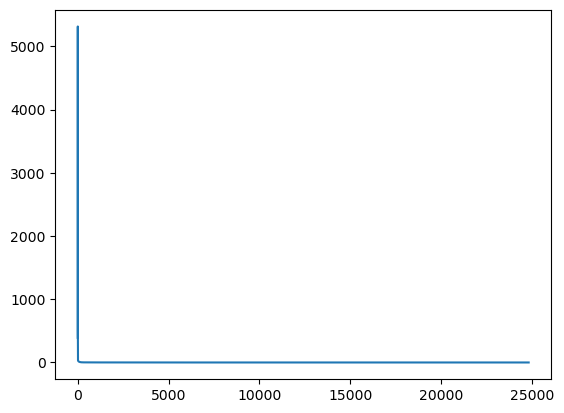

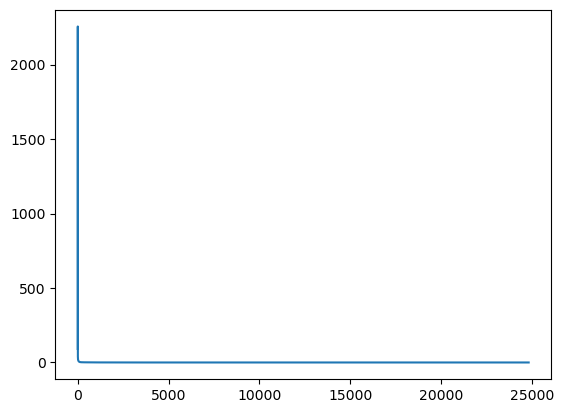

In [20]:
x1 =  np.random.normal(0,1,4)
c1 = 0.9
tau =0.00001
ro = 0.4
start = time.time()
res1,cord1,cord2,iter=Steepestdes_backt(x1,tau,ro,c1,wood,grad_wood)
stop = time.time() 
print(res1)
print("Numero de iteraciones :",iter)
print("Tiempo: ", stop-start)
Plotear(cord1)
Plotear(cord2)

#start = time.time()
#stop = time.time()  
#print("Tiempo: ", stop-start) 

# BISECCCION

In [22]:
def bisection(alpha_0,x,f,g,d,c1,c2):
    alpha = 0
    beta = float('inf')
    alpha_i = alpha_0
    alpha_i_1= alpha_i

    while True:
        if ( f(x+alpha_i*d) > f(x)+c1*alpha_i*np.dot(g(x),d) ):
            beta = alpha_i
            alpha_i_1 = 0.5*(alpha+beta)
        elif ( np.dot(g(x+alpha_i*d),d) < c2*np.dot(g(x),d) ):
            alpha = alpha_i
            if beta == float('inf'):
                alpha_i_1 = 2 * alpha
            else:
                alpha_i_1 = 0.5 *(alpha+beta)
        else:
            break

        alpha_i = alpha_i_1
    

    return alpha_i

x=np.array([1,-1.2,1,-1.2])
alpha=1
c1=0.3
c2=0.7
d=-grad_wood(x)
print(bisection(alpha,x,wood,grad_wood,d,c1,c2))

0.0009765625


La raiz es: [1.00000379 1.00000758 0.99999622 0.99999242] Numero de Iteraciones: 7104
Tiempo:  0.7399356365203857


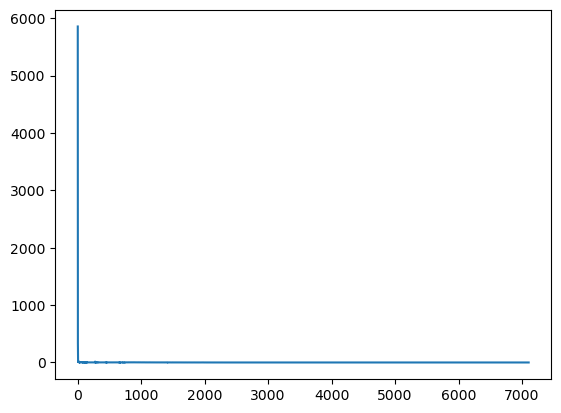

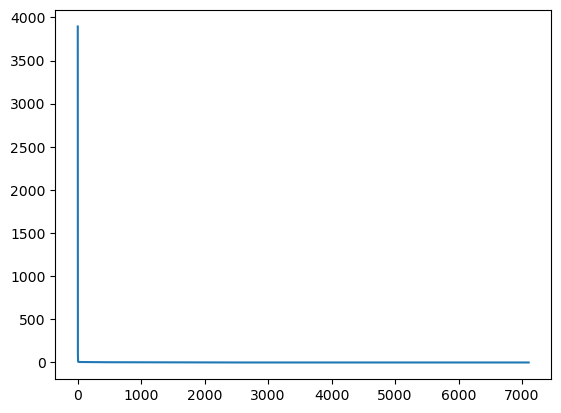

In [28]:
def Steepestdes_bisection(x0,c1,c2,f,g,tau):
    k=0
    d = -g(x0)
    alpha = 1
    x=x0
    graf1=[]
    graf2=[]
    graf1.append((k,np.linalg.norm(g(x))))
    graf2.append((k,f(x)))
    while np.linalg.norm( g(x)) >= tau:
        alpha = bisection(alpha,x,f,g,d,c1,c2)
        x     = x + alpha*d
        d     = -g(x)
        k     = k + 1
        graf1.append((k,np.linalg.norm(g(x))))
        graf2.append((k,f(x)))

    return x,k,graf1,graf2


c1=0.3
c2=0.6
x1= np.random.normal(0,1,4)
start = time.time()
res1,iter,cord1,cord2 = Steepestdes_bisection(x1,c1,c2,wood,grad_wood,tau)
stop = time.time()  
print("La raiz es:",res1, "Numero de Iteraciones:",iter)
print("Tiempo: ", stop-start) 
Plotear(cord1)
Plotear(cord2)

#start = time.time()
#stop = time.time()  
#print("Tiempo: ", stop-start) 


# METODO DE REGION DE CONFIANZA (DOG-LEG)

In [34]:
# DOG-LEG

def Paso_Cauchy(x,H,g,delta):
    tau_k = 0 #el valor de tau
    gT_H_g = (g(x).dot(H(x))).dot(g(x)) 

    if gT_H_g <= 0: #Paso Cauchy
            tau_k = 1
    else:
        norma = np.linalg.norm(g(x))
        tau_k = min( 1 , norma**3 / (delta * gT_H_g ) )

    P_C_k = -tau_k * ( delta / np.linalg.norm(g(x)) ) * g(x) #Paso Cauchy

    return P_C_k


def Dogleg(x,H,g,delta):
   

    P_C_k = Paso_Cauchy(x,H,g,delta) #Paso Cauchy

    gT_H_g = (g(x).dot(H(x))).dot(g(x)) 
    
    P_U_k = - np.dot(g(x),g(x))/( gT_H_g ) * g(x)

    B_k = np.linalg.inv(H(x))
    P_B_k = -B_k.dot(g(x))
    
    if np.linalg.norm(P_U_k) >= delta:
        P_k = P_C_k
        return P_k
    
    if np.linalg.norm(P_B_k) <= delta:
        P_k = P_B_k
        return P_k

    a = np.linalg.norm(P_B_k-P_U_k)**2
    b = 2* P_B_k.dot(P_B_k - P_U_k)
    c = np.linalg.norm(P_U_k)**2 - delta**2

    D = b**2-4*a*c

    lam = (-b + np.sqrt(D))/(2*a)

    tau_k = lam + 1

    if  0<= tau_k and tau_k <= 1:
        P_k = tau_k * P_U_k
        return P_k
    if  1<= tau_k and tau_k <= 2:
        P_k =  P_U_k + (tau_k - 1)*(P_B_k - P_U_k )
        return P_k
    

    return P_C_k

In [32]:
def m(p,g,H,f,x):
    t = 0.5
    m_k = f(x)+np.dot(g(x),p) +0.5*np.dot(p,np.dot(H(x+t*p),p)) 
    return m_k

def ro(p,g,H,f,x):
    zero = np.zeros(p.size)
    return (f(x)-f(x+p)) /(m(zero,g,H,f,x)- m(p,g,H,f,x))

def Delta(rou,p,delta_k,DELTA):
    ETA = np.array([0.25,0.75,0.25,2])
    eta1 = ETA[0]
    eta2 = ETA[1]
    Eta1 = ETA[2]
    Eta2 = ETA[3]

    delta_old = delta_k

    if rou < eta1:
        delta_new = eta1*delta_old
    else:
        if rou > eta2 and np.linalg.norm(p) == delta_old:
            delta_new = min(Eta2*delta_old,DELTA)
        else:
            delta_new = delta_old
    
    return delta_new

In [30]:
def RDC_Dogleg(delta_0,eta,g,H,f,x0,tol):
    
    delta_k = delta_0
    x_old = x0
    k=0
    x_new = np.zeros(x0.size)
    graf1=[]
    graf2=[]
    graf1.append((k,np.linalg.norm(g(x_new))))
    graf2.append((k,f(x)))
    while np.linalg.norm(g(x_old)) > tol and k < 10000:
        
        p_k = Dogleg(x_old,H,g,delta_k)
        ro_k = ro(p_k,g,H,f,x_old)

        if ro_k > eta:
            x_new = x_old + p_k
        else:
            x_new = x_old


        graf1.append((k,np.linalg.norm(g(x_new))))
        graf2.append((k,f(x_new)))


        x_old = x_new
        delta_k = Delta(ro_k,p_k,delta_k,2) #DELTA_HAT = 2
        k = k+1
    
    return x_new,k,graf1,graf2

    

[-0.68854094  0.87870337  2.1962361   0.61112728]
[0.99999989 0.99999978 0.99999955 0.99999911]
1.2714247165702232e-11
21
Tiempo:  0.012964963912963867


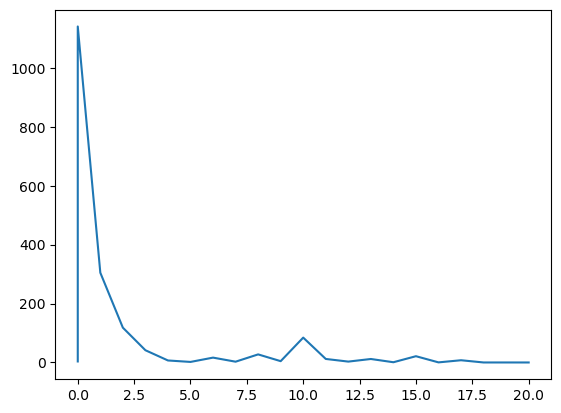

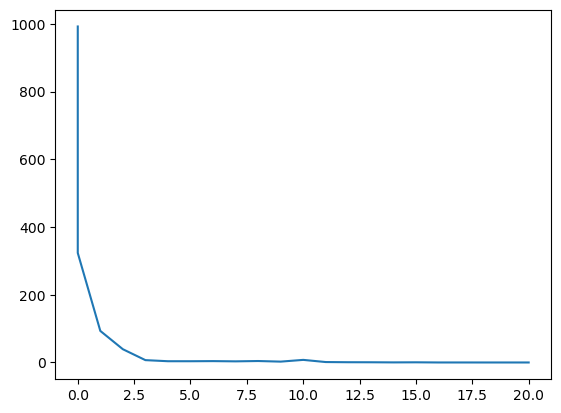

In [37]:
x_inicial = np.ones(4)+np.random.uniform(-2,2,4)
print(x_inicial)
start = time.time()
x_opt,num,graf_grad,graf_function = RDC_Dogleg(1.5,0.15,grad_Rosembrock,hess_Rosembrock,Rosembrock,x_inicial,0.00001)
stop = time.time()
print(x_opt)
print(wood(x_opt))
print(num)
print("Tiempo: ", stop-start) 

Plotear(graf_grad)
Plotear(graf_function)

#start = time.time()
#stop = time.time()  
#print("Tiempo: ", stop-start) 

# METODO DE NEWTON

In [39]:
def Newton(x0,f,H,g,tol):
    k=0
    n=x0.size
    #print(n)
    d = np.linalg.solve(H(x0),-g(x0))
    x = x0
    graf1=[]
    graf2=[]
    graf1.append((k,np.linalg.norm(g(x))))
    graf2.append((k,f(x)))
    while np.linalg.norm(g(x)) > tol and k <122180*2:
        x = x + d
        k=k+1
        graf1.append((k,np.linalg.norm(g(x))))
        graf2.append((k,f(x)))
        d = np.linalg.solve(H(x),-g(x))
        
    return x,k,graf1,graf2


Solucion: [1. 1. 1. 1.]
Iteraciones: 13
Tiempo:  0.001993894577026367


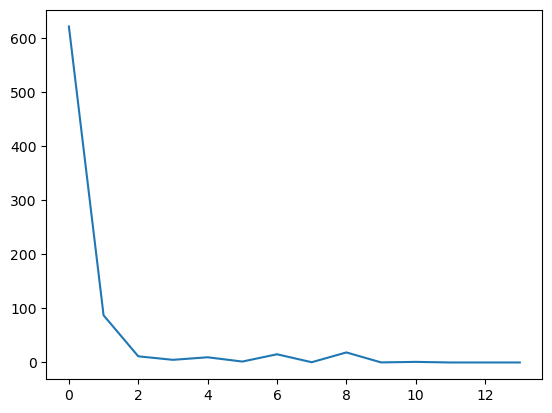

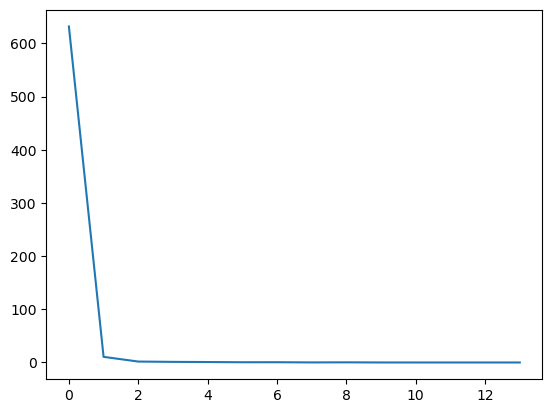

In [43]:
x0=np.random.normal(0,1,4)
start = time.time()
res1,iter,cord1,cord2= Newton(x0,Rosembrock,hess_Rosembrock,grad_Rosembrock,0.000001)
stop = time.time() 
print("Solucion:",res1)
print("Iteraciones:",iter)
print("Tiempo: ", stop-start)
Plotear(cord1)
Plotear(cord2)

#start = time.time()
#stop = time.time()  
#print("Tiempo: ", stop-start) 

# FUNCION ROSEMBROOCK

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


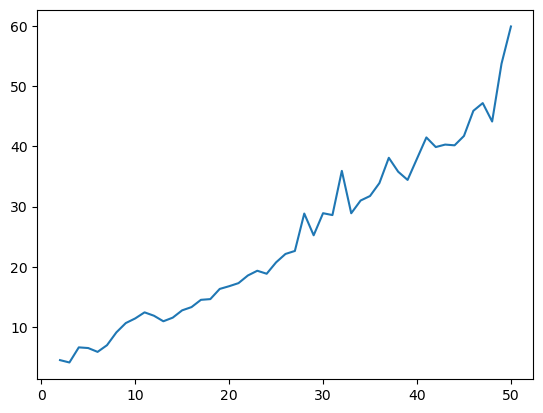

In [57]:
time_Steepest_decent = []

for i in range(2,51):
    x0 = np.random.normal(0,1,i)
    start = time.time()
    sol,graf_gradient, graf_function, iter = Steepest_decent(x0,Rosembrock,grad_Rosembrock,0.0001)
    stop = time.time()
    time_Steepest_decent.append((i,stop-start))
    print(i)

Plotear(time_Steepest_decent)


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


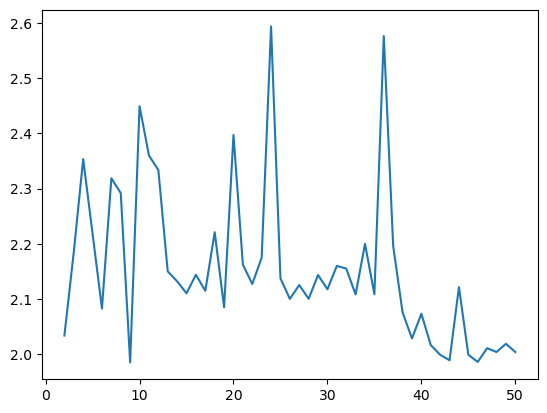

In [69]:
time_Steepest_decent_backt = []

for i in range(2,51):
    x0 = np.random.normal(0,1,i)
    start = time.time()
    res1,cord1,cord2,iter=Steepestdes_backt(x1,tau,ro,c1,Rosembrock,grad_Rosembrock)
    stop = time.time()
    time_Steepest_decent_backt.append((i,stop-start))
    print(i)

Plotear(time_Steepest_decent_backt)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


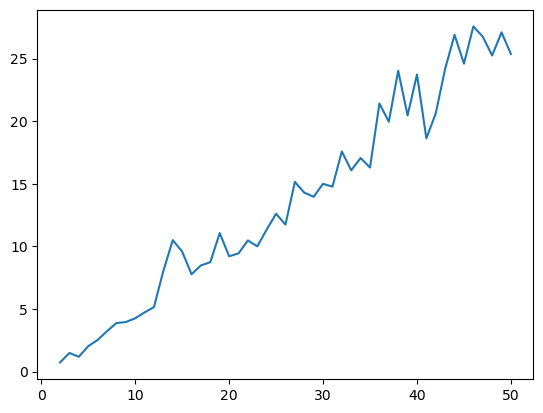

In [72]:
time_Steepest_decent_bisec = []

for i in range(2,51):
    x0 = np.random.normal(0,1,i)
    start = time.time()
    c1=0.3
    c2=0.6
    res1,iter,cord1,cord2 = Steepestdes_bisection(x0,c1,c2,Rosembrock,grad_Rosembrock,tau)
    stop = time.time()
    time_Steepest_decent_bisec.append((i,stop-start))
    print(i)

Plotear(time_Steepest_decent_bisec)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


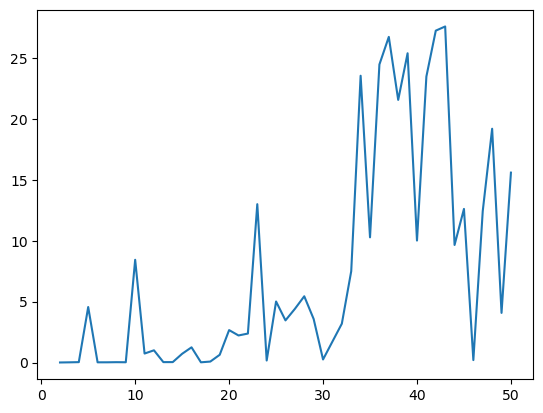

In [82]:
time_Dogleg = []

for i in range(2,51):
    x0 = np.random.normal(0,1,i)
    start = time.time()
    x_opt,num,graf_grad,graf_function = RDC_Dogleg(1.5,0.15,grad_Rosembrock,hess_Rosembrock,Rosembrock,x0,0.00001)
    stop = time.time()
    time_Dogleg.append((i,stop-start))
    print(i)

Plotear(time_Dogleg)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


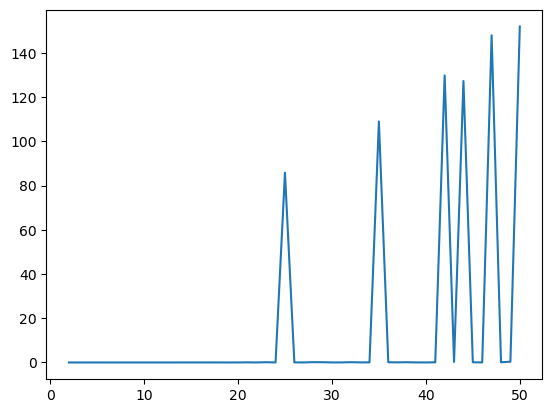

In [91]:
time_Newton = []

for i in range(2,51):
    x0 = np.random.normal(0,1,i)
    start = time.time()
    res1,iter,cord1,cord2= Newton(x0,Rosembrock,hess_Rosembrock,grad_Rosembrock,0.0001)
    stop = time.time()
    time_Newton.append((i,stop-start))
    print(i)

Plotear(time_Newton)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


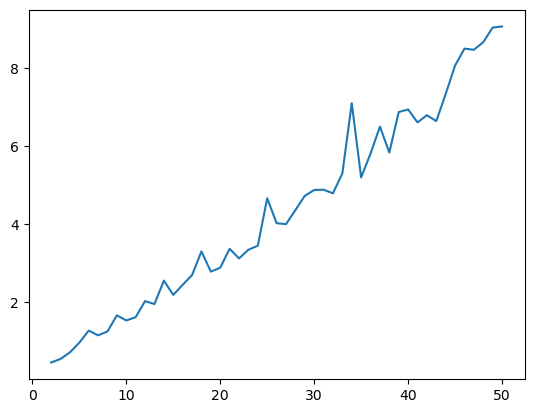

In [93]:
time_CLS = []

for i in range(2,51):
    x0 = np.random.normal(0,1,i)
    start = time.time()
    x, it, CLS_graf_grad, CLS_graf_function = find_minimal(x0, Rosembrock, grad_Rosembrock, 0.01, 1)
    stop = time.time()
    time_CLS.append((i,stop-start))
    print(i)

Plotear(time_CLS)

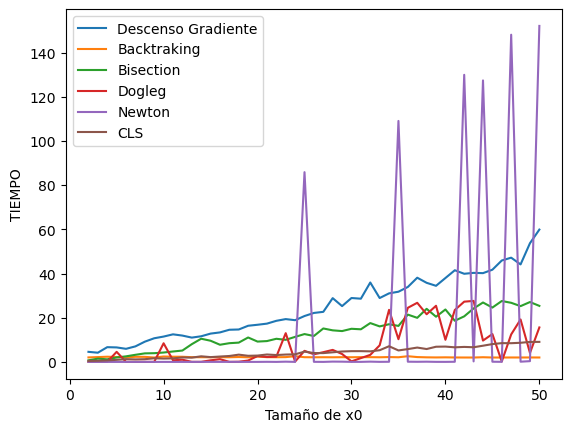

In [96]:
import matplotlib.pyplot as plt

def graficar_listas(nombres,*listas):
    fig, ax = plt.subplots()
    
    for i, lista in enumerate(listas):
        x = [tupla[0] for tupla in lista]
        y = [tupla[1] for tupla in lista]
        ax.plot(x, y, label=nombres[i])
    
    ax.set_xlabel('Tamaño de x0')
    ax.set_ylabel('TIEMPO')
    ax.legend()
    plt.show()


nombres =["Descenso Gradiente","Backtraking", "Bisection", "Dogleg","Newton","CLS"]
# Ejemplo de uso
lista1 = time_Steepest_decent
lista2 = time_Steepest_decent_backt
lista3 = time_Steepest_decent_bisec
lista4 = time_Dogleg
lista5 = time_Newton
lista6 = time_CLS


graficar_listas(nombres,lista1, lista2,lista3,lista4,lista5,lista6)